Общая выручка: 281.80
Товар, проданный наибольшее количество раз: Печенье (25 шт.)
Товар, принесший наибольшую выручку: Шоколад (52.50 руб.)
Отчет по продажам:
Общая выручка: 281.80
Продажи по товарам:
  Бананы: 12 шт., 14.40 руб. (0.05%)
  Йогурт: 15 шт., 30.00 руб. (0.11%)
  Печенье: 25 шт., 45.00 руб. (0.16%)
  Сок: 18 шт., 50.40 руб. (0.18%)
  Сыр: 8 шт., 32.00 руб. (0.11%)
  Хлеб: 5 шт., 7.50 руб. (0.03%)
  Чай: 10 шт., 30.00 руб. (0.11%)
  Шоколад: 15 шт., 52.50 руб. (0.19%)
  Яблоки: 20 шт., 20.00 руб. (0.07%)


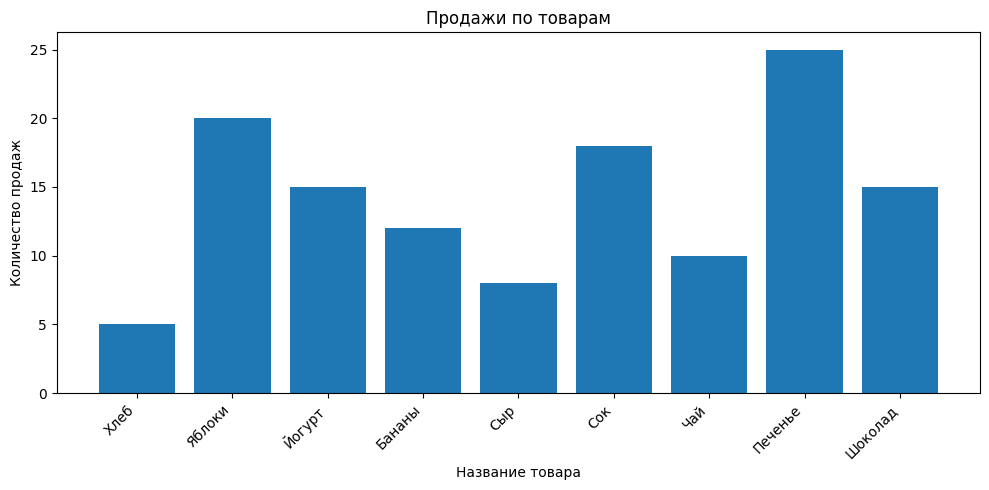

Товар, найденный по цене 1: Яблоки


In [39]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# словарь для хранения цен за единицу товаров
product_prices = {}

def read_sales_data(filename):#считывает данные о продажах с csv
    sales_data = []
    try:
        with open(filename, 'r', encoding='utf-8-sig') as csvfile:
            reader = csv.DictReader(csvfile, delimiter='|')
            next(reader)  # Пропуск заголовка
            for row in reader:
                row['Количество продаж'] = int(row['Количество продаж'])
                row['Цена за единицу'] = float(row['Цена за единицу'])
                row['Общая стоимость'] = float(row['Общая стоимость'])
                sales_data.append(row)
                # Заполняет словарь с ценами за ед
                product_prices[row['Название товара']] = row['Цена за единицу']
    except FileNotFoundError:
        print(f"Ошибка: Файл '{filename}' не найден.")
    except csv.Error as e:
        print(f"Ошибка при чтении CSV файла: {e}")
    return sales_data

def calculate_total_revenue(sales_data):#Рассчитывает общую выручку магазина
    total_revenue = sum(item['Общая стоимость'] for item in sales_data)
    return total_revenue

def find_best_selling_product(sales_data):#товар который был продан наибольшее кол-во раз
    product_sales = defaultdict(int)
    for item in sales_data:
        product_sales[item['Название товара']] += item['Количество продаж']
    best_selling_product = max(product_sales, key=product_sales.get)
    return best_selling_product, product_sales[best_selling_product]

def find_highest_revenue_product(sales_data):#Находит товар, который принес наибольшую выручку
    product_revenue = defaultdict(float)
    for item in sales_data:
        product_revenue[item['Название товара']] += item['Общая стоимость']
    highest_revenue_product = max(product_revenue, key=product_revenue.get)
    return highest_revenue_product, product_revenue[highest_revenue_product]

def generate_report(sales_data):#Составляет отчет о продажах
    total_revenue = calculate_total_revenue(sales_data)
    product_sales = defaultdict(int)
    product_revenue = defaultdict(float)
    
    for item in sales_data:
        product_name = item['Название товара']
        product_sales[product_name] += item['Количество продаж']
        product_revenue[product_name] += item['Общая стоимость']
    
    report = []
    for product_name in product_sales:
        revenue_share = product_revenue[product_name] / total_revenue
        report.append({
            'Название товара': product_name,
            'Количество продаж': product_sales[product_name],
            'Общая стоимость': product_revenue[product_name],
            'Доля в общей выручке': revenue_share
        })
    return report

def print_report(report, total_revenue):#вывод в консоль
    print("Отчет по продажам:")
    print(f"Общая выручка: {total_revenue:.2f}")
    print("Продажи по товарам:")
    for item in report:
        print(f"  {item['Название товара']}: {item['Количество продаж']} шт., {item['Общая стоимость']:.2f} руб. ({item['Доля в общей выручке']:.2f}%)")
        def plot_sales_data(sales_data):"""Строит график количества продаж по товарам."""
    product_sales = defaultdict(int)
    for item in sales_data:
        product_sales[item['Название товара']] += item['Количество продаж']

    products = list(product_sales.keys())
    sales = list(product_sales.values())

    plt.figure(figsize=(10, 5))
    plt.bar(products, sales)
    plt.xlabel('Название товара')
    plt.ylabel('Количество продаж')
    plt.title('Продажи по товарам')
    plt.xticks(rotation=45, ha='right') # Поворачиваем подписи оси x
    plt.tight_layout()
    plt.show()

def quicksort(data, left, right):#Реализация быстрой сортировки по названию товара
    if left < right:
        pivot_index = partition(data, left, right)
        quicksort(data, left, pivot_index - 1)
        quicksort(data, pivot_index + 1, right)

def partition(data, left, right):#ф-я для разделения списка
    pivot = data[right]
    i = left - 1
    for j in range(left, right):
        if data[j]['Название товара'] <= pivot['Название товара']:
            i += 1
            data[i], data[j] = data[j], data[i]
    data[i + 1], data[right] = data[right], data[i + 1]
    return i + 1

def binary_search_by_price(data, target_price):#бинарный поиск для товара за единицу
    left, right = 0, len(data) - 1
    while left <= right:
        mid = (left + right) // 2
        if data[mid]['Цена за единицу'] < target_price:
            left = mid + 1
        elif data[mid]['Цена за единицу'] > target_price:
            right = mid - 1
        else:
            return data[mid]
    return None

if __name__ == "__main__":
    filename = "ppc.csv"  #имя файла сsv
    sales_data = read_sales_data(filename)

    if sales_data:
        total_revenue = calculate_total_revenue(sales_data)
        print(f"Общая выручка: {total_revenue:.2f}")

        best_selling_product, best_selling_quantity = find_best_selling_product(sales_data)
        print(f"Товар, проданный наибольшее количество раз: {best_selling_product} ({best_selling_quantity} шт.)")

        highest_revenue_product, highest_revenue = find_highest_revenue_product(sales_data)
        print(f"Товар, принесший наибольшую выручку: {highest_revenue_product} ({highest_revenue:.2f} руб.)")

        report = generate_report(sales_data)# Сортировка отчета по названию товара
        quicksort(report, 0, len(report) - 1)
        print_report(report, total_revenue)

        # сортировка по цене за единицу
        sorted_sales_data = sorted(sales_data, key=lambda x: x['Цена за единицу'])
        
        # Пример использования бинарного поиска
        target_price = 1  #можно заменить на другое значение из таблицы
        found_product = binary_search_by_price(sorted_sales_data, target_price)
        if found_product:
            print(f"Товар, найденный по цене {target_price}: {found_product['Название товара']}")
        else:
            print(f"Товар с ценой {target_price} не найден.")
    else:
        print("Нет данных о продажах.")